## Exercise Set 4

Due 11/2 10am

20 points. 10 questions (2 points each)

Name your submission your_rcsid_Exercise4.ipynb

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### Questions 1-3 using college.csv, which contains:

A data frame with 777 observations on the following 18 variables.  

Private: No or Yes indicating private or public university  
Apps: Number of applications received  
Accept: Number of applications accepted  
Enroll: Number of new students enrolled  
Top10perc: Pct. new students from top 10% of H.S. class  
Top25perc: Pct. new students from top 25% of H.S. class  
F.Undergrad: Number of fulltime undergraduates  
P.Undergrad: Number of parttime undergraduates  
Outstate: Out-of-state tuition  
Room.Board: Room and board costs  
Books: Estimated book costs  
Personal: Estimated personal spending  
PhD: Pct. of faculty with Ph.D.'s  
Terminal: Pct. of faculty with terminal degree  
S.F.Ratio: Student/faculty ratio  
perc.alumni: Pct. alumni who donate  
Expend: Instructional expenditure per student  
Grad.Rate: Graduation rate  

In [3]:
college = pd.read_csv("College2.csv",index_col = 0)
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
idx = list(range(len(college.columns)))
idx.remove(1)
X = college.iloc[:, idx].values
y = college.iloc[:, 1].values # number of applications

labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


feats = college.columns.tolist()
del feats[1]
feats

['Private',
 'Accept',
 'Enroll',
 'Top10perc',
 'Top25perc',
 'F.Undergrad',
 'P.Undergrad',
 'Outstate',
 'Room.Board',
 'Books',
 'Personal',
 'PhD',
 'Terminal',
 'S.F.Ratio',
 'perc.alumni',
 'Expend',
 'Grad.Rate']

### 1. Ridge Regression

Predict Apps ( Number of applications received) with a Ridge regression model using RidgeCV.  
Output $R^2$ and MSE for the test data and the best alpha.

In [5]:
# Your Code Here
from sklearn.linear_model import Ridge, RidgeCV 
model = RidgeCV(store_cv_values = True)
model.fit(X_train, y_train)
print('R-Squared: ',model.score(X_test,y_test))
yhat = model.predict(X_test)
mse = np.mean((y_test - yhat)**2)
print('MSE: ',mse)
print('Alpha: ', model.alpha_)


R-Squared:  0.9003284006032195
MSE:  1021516.9028296437
Alpha:  0.1


### 2. Lasso Regression

Predict Apps ( Number of applications received) with a Lasso regression model using LassoCV. 

Output $R^2$ and MSE for the test data and the best alpha.

In [6]:
# Your Code Here
from sklearn.linear_model import LassoCV
model = LassoCV()
model.fit(X,y)
print('R-Squared: ',model.score(X_test,y_test))
yhat = model.predict(X_test)
mse = np.mean((y_test - yhat)**2)
print('MSE: ',mse)
print('Alpha: ', model.alpha_)


R-Squared:  -1.328619583133102
MSE:  23865617.476059254
Alpha:  43489.57779381499


### 3. Elastic Net Regression

Fit an ElasticNet Cross-Validated model to the training data.  
Plot the coefficients.  
Print the number of coefficients shrunk to zero.

Number of coefficients ElasticNet regression shrunk to 0: 6


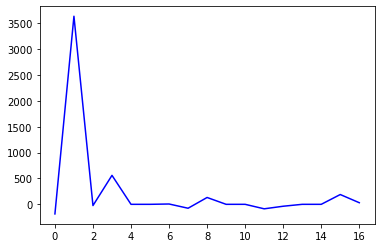

In [7]:
# Your Code Here
from sklearn.linear_model import ElasticNetCV
model = ElasticNetCV(l1_ratio = 1)
model.fit(X_train,y_train)
coefs_EN = model.coef_
plt.plot(range(len(coefs_EN)),coefs_EN,'b') 
print(f'Number of coefficients ElasticNet regression shrunk to 0: {np.sum(coefs_EN == 0)}')


### MPG Dataset

In [8]:
mpg = sns.load_dataset('mpg')
mpg.dropna(inplace=True)
mpg.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [9]:
X = mpg.iloc[:,1:-2].values
y = mpg.loc[:,'mpg'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.20, random_state = 1234)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((313, 6), (79, 6), (313,), (79,))

### 4. Decision Tree Regression

Using the MPG dataset, create a Decision Tree regressor with a max_depth of 6 and mean squared error for the criterion.

Output the model parameters.

In [10]:
# Your Code Here
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
# Fit Tree to Training data
model = DecisionTreeRegressor(max_depth = 6, criterion = 'squared_error', random_state = 1234)
model.fit(X_train, y_train)
model.get_params()


{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1234,
 'splitter': 'best'}

###  5. Pruning a Decision Tree 

Using the model from  question 4, determine the best ccp_alpha for the seaborn 'mpg' dataset.

Determine the ccp_alphas with cost_complexity_pruning_path.

Using the ccp_alphas, determine the best model score.

Output the best score


In [11]:
# Your Code Here
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
models = []
for ccp_alpha in ccp_alphas:
    model = DecisionTreeRegressor(max_depth = 6, criterion = 'squared_error', ccp_alpha=ccp_alpha, random_state = 1234)
    model.fit(X_train, y_train)
    models.append(model)

train_scores = [m.score(X_train, y_train) for m in models]
test_scores = [m.score(X_test, y_test) for m in models]
print('The best score:', max(test_scores))
best_alpha = ccp_alphas[np.argmax(test_scores)]
print(f'The best alpha is {ccp_alphas[np.argmax(test_scores)]}')

The best score: 0.8031263514559519
The best alpha is 0.5613162939297054


### 6. Fit a Decision Tree Regressor to the seaborn 'mpg' dataset. 

Predict mpg as a  function of all the features.  Use the ccp_alpha from 5.

Output feature importances and R-squared.

In [12]:
# Your Code Here
dt = DecisionTreeRegressor(max_depth = 6, criterion = 'squared_error', ccp_alpha=best_alpha, random_state = 1234)
dt.fit(X_train, y_train)
vals = dt.feature_importances_
feats = mpg.columns[1:-2]
pairs = [(vals[i],feats[i]) for i in range(len(vals))]
pairs.sort(reverse=True)
for val,feat in pairs:
    print(feat,'\t',round(val,6))
print('\nR-Squared: ',dt.score(X_test,y_test))


cylinders 	 0.680885
horsepower 	 0.119929
model_year 	 0.099932
displacement 	 0.063988
weight 	 0.035266
acceleration 	 0.0

R-Squared:  0.8031263514559519


### 7. Bootstrap

Given the code below create two distributions:  
Distribution 1: Sampling Distribution of the Mean  
Distribution 2: Bootstrap means.

Plot the distributions 

In [13]:
np.random.seed(1234)
N = 10000 #Number of samples in distribution
sample_size = 100

Population = np.random.randint(1,100,size=1000)

def sample_pop(sample_size):
    return np.random.choice(Population,sample_size)

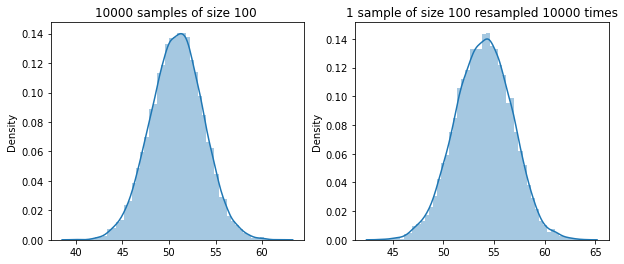

In [14]:
# Your Code Here
from sklearn.utils import resample
dist1 = [np.mean(sample_pop(sample_size)) for i in range(N)]
Z = sample_pop(sample_size)
dist2 = [np.mean(resample(Z)) for i in range(N)]
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
sns.distplot(dist1,ax=ax1)
ax1.set_title(f'{N} samples of size {sample_size} ')
sns.distplot(dist2,ax=ax2)
ax2.set_title(f'1 sample of size {sample_size} resampled {N} times');


### 8. RandomForest  regression 

Using the Hitters dataset  and the code below to predict Salary

Create a Random Forest regression model.

Output R-squared and feature importances


In [15]:
Hitters = pd.read_csv('Hitters.csv')
Hitters = Hitters.dropna()
Hitters.head()


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [16]:
feats = ['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
         'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors']

X = Hitters.loc[:, feats].values
y = Hitters.loc[:, 'Salary'].values

# Make Validation Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1234)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((197, 16), (66, 16), (197,), (66,))

In [17]:
# Your Code Here
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
bt = RandomForestRegressor(n_estimators = 10, random_state = 1234)
bt.fit(X_train, y_train)
print('R-Squared: ',bt.score(X_test,y_test))
vals = bt.feature_importances_
pairs = [(vals[i],feats[i]) for i in range(len(vals))]
pairs.sort(reverse=True)
for val,feat in pairs:
    print(feat,'\t',round(val,6))

R-Squared:  0.5642575336447668
CRBI 	 0.197653
CHits 	 0.14568
CRuns 	 0.127179
Walks 	 0.101807
Runs 	 0.074423
PutOuts 	 0.061819
AtBat 	 0.043756
RBI 	 0.043359
CAtBat 	 0.041863
CHmRun 	 0.037437
HmRun 	 0.036066
Hits 	 0.030894
Errors 	 0.021609
Assists 	 0.020602
Years 	 0.010341
CWalks 	 0.005512


### 9. Grid Search for Random Forest

Do a grid search for the best parameters of a RandomForestRegressor  estimator.  

Search over 10,100,500 estimators, 3,6,9,12,16 max_features and 'mse', 'mae' criterion.

Output the best score and best parameters.

In [18]:
# Your Code Here
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [10, 100,500], 'max_features': [3,6, 9, 12, 16],'criterion':['mse','mae']}]
grid_search = GridSearchCV(estimator = RandomForestRegressor(),
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_score = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best score: ", best_score)
print("Best parameters: ", best_parameters )


Best score:  0.5023637457022534
Best parameters:  {'criterion': 'mse', 'max_features': 3, 'n_estimators': 500}


### 10. Create a  RandomForestRegressor model with the best parameters from 9.  
Output the test data R-squared and MSE.

In [19]:
# Your Code Here
model = RandomForestRegressor(n_estimators = best_parameters['n_estimators'], 
                              max_features = best_parameters['max_features'],
                              criterion = best_parameters['criterion'])
model.fit(X_train, y_train)
print('R-Squared: ',model.score(X_test,y_test))
yhat = model.predict(X_test)
mse = np.mean((y_test - yhat)**2)
print('MSE: ',mse)


R-Squared:  0.7375323676308451
MSE:  37101.297494789316
